In [56]:
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()

In [57]:
df = pd.read_csv("../data/boil_and_flood.csv", skiprows=1)
df.head()

,Month,boil water: (United States),flood: (United States)
0,2004-01,1,25
1,2004-02,1,26
2,2004-03,1,28
3,2004-04,1,28
4,2004-05,1,31


In [58]:
df["Month"] = pd.to_datetime(df["Month"])

In [59]:
df = df.set_index("Month")
df.columns = ["boil_water", "flood"]
df.head()

,boil_water,flood
Month,,
2004-01-01,1,25
2004-02-01,1,26
2004-03-01,1,28
2004-04-01,1,28
2004-05-01,1,31


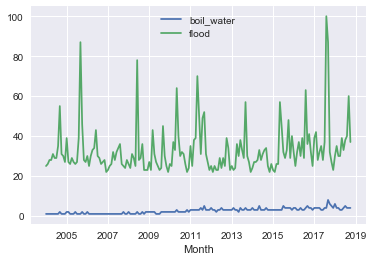

In [60]:
df.plot()

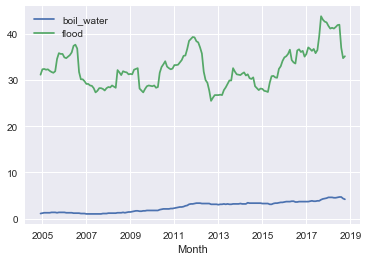

In [61]:
df.rolling(12).mean().plot()

In [62]:
df.corr()

,boil_water,flood
boil_water,1.000000,0.278071
flood,0.278071,1.000000


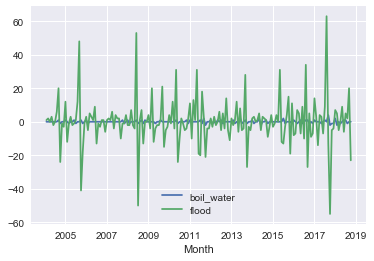

In [63]:
df.diff().plot()

In [64]:
df.diff().describe()

,boil_water,flood
count,177.000000,177.000000
mean,0.016949,0.067797
std,0.808159,13.893096
min,-2.000000,-55.000000
25%,0.000000,-5.000000
50%,0.000000,0.000000
75%,0.000000,4.000000
max,4.000000,63.000000


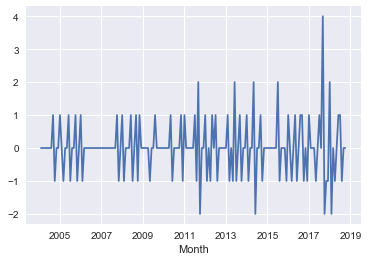

In [65]:
df.boil_water.diff().plot()

In [66]:
df.diff().corr()

,boil_water,flood
boil_water,1.000000,0.189665
flood,0.189665,1.000000


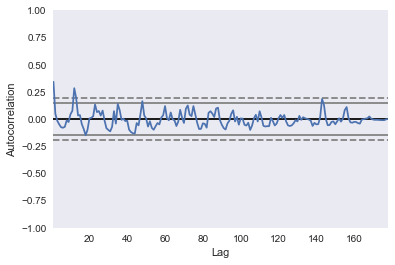

In [67]:
pd.plotting.autocorrelation_plot(df.flood)

In [68]:
for i in range(20):
    print(i, df["flood"].autocorr(lag=i))

0 1.0
1 0.3431793295340197
2 0.05013849983097196
3 -0.014925577698957672
4 -0.04807075659702047
5 -0.0754851560952813
6 -0.0810350867157215
7 -0.07260876234795105
8 -0.011861801889250555
9 -0.027813839398064373
10 0.04568508415062249
11 0.07877296328637634
12 0.2945028380028696
13 0.20164654905505183
14 0.03776596869292982
15 0.04666098690641404
16 -0.05709271499052741
17 -0.11222754983082943
18 -0.18465744166050913
19 -0.12164210169013924


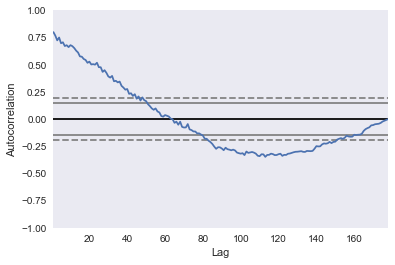

In [69]:
pd.plotting.autocorrelation_plot(df.boil_water)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

predicted=41.767012, expected=30.000000
predicted=31.901843, expected=27.000000
predicted=31.135296, expected=22.000000
predicted=25.751949, expected=24.000000
predicted=26.301628, expected=27.000000
predicted=26.566000, expected=27.000000
predicted=29.809209, expected=28.000000
predicted=32.743129, expected=33.000000
predicted=33.532349, expected=28.000000
predicted=31.045764, expected=31.000000
predicted=29.225935, expected=33.000000
predicted=36.914599, expected=34.000000
predicted=31.434946, expected=25.000000
predicted=27.141753, expected=22.000000
predicted=24.543776, expected=26.000000
predicted=26.097441, expected=23.000000
predicted=25.065415, expected=22.000000
predicted=25.562907, expected=26.000000
predicted=27.042869, expected=26.000000
predicted=28.745673, expected=57.000000
predicted=37.979024, expected=45.000000
predicted=35.843802, expected=32.000000
predicted=34.314991, expected=29.000000
predicted=30.927332, expected=33.000000
predicted=28.485261, expected=48.000000


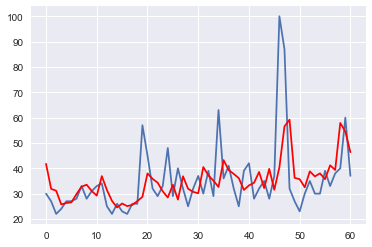

In [76]:
series = df["flood"]
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

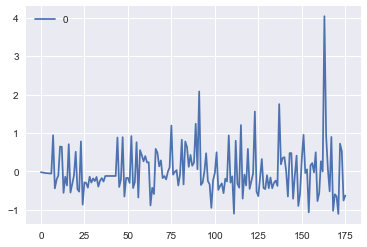

In [78]:
import pandas as pd
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

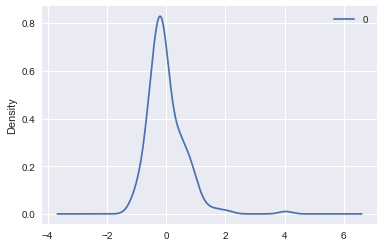

In [79]:
residuals.plot(kind='kde')

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

predicted=3.495469, expected=3.000000
predicted=3.320961, expected=3.000000
predicted=3.239174, expected=3.000000
predicted=3.222169, expected=4.000000
predicted=3.531198, expected=3.000000
predicted=3.414099, expected=3.000000
predicted=3.068404, expected=3.000000
predicted=3.578012, expected=5.000000
predicted=3.211239, expected=3.000000
predicted=3.562345, expected=3.000000
predicted=3.399489, expected=3.000000
predicted=3.737894, expected=4.000000
predicted=3.452922, expected=3.000000
predicted=3.307885, expected=3.000000
predicted=3.348269, expected=3.000000
predicted=3.639558, expected=3.000000
predicted=3.085379, expected=3.000000
predicted=3.086431, expected=3.000000
predicted=3.420578, expected=3.000000
predicted=2.988662, expected=3.000000
predicted=3.140921, expected=3.000000
predicted=3.051992, expected=5.000000
predicted=3.528249, expected=4.000000
predicted=3.445552, expected=4.000000
predicted=3.592820, expected=4.000000
predicted=4.131701, expected=4.000000
predicted=3.

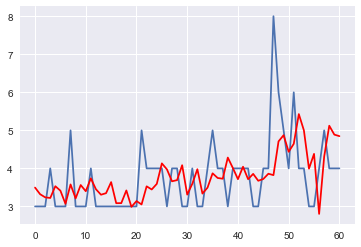

In [77]:
series = df["boil_water"]
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()